In [1]:
## Import basic libraries to handle data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Import data
data_path = "data/abalone.csv"
abalone_data = pd.read_csv(data_path)
abalone_data.head(10)

,sex,length,diameter,height,wholeweight,shuckedweight,visceraweight,shellweight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [3]:
## Explore data
np_abalone_data = np.array(abalone_data)
print(np_abalone_data[0:5,:])

[['M' 0.455 0.365 0.095 0.514 0.2245 0.10099999999999999 0.15 15]
 ['M' 0.35 0.265 0.09 0.2255 0.0995 0.0485 0.07 7]
 ['F' 0.53 0.42 0.135 0.677 0.2565 0.1415 0.21 9]
 ['M' 0.44 0.365 0.125 0.516 0.2155 0.114 0.155 10]
 ['I' 0.33 0.255 0.08 0.205 0.0895 0.0395 0.055 7]]


In [4]:
datax = np_abalone_data[:,1:7]
datay = np_abalone_data[:,8]

In [5]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax, datay, test_size=0.4)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(trnx)
trnx_scale = scaler.transform(trnx)
tstx_scale = scaler.transform(tstx)
print(np.min(trnx_scale[:,0]), np.max(trnx_scale[:,0]))
print(np.min(tstx_scale[:,0]), np.max(tstx_scale[:,0]))

0.0 1.0
-0.08029197080291973 0.978102189781022


C:\Users\Eun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
from sklearn import neighbors
k=40
knn_model = neighbors.KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X=trnx, y=trny)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=40, p=2,
          weights='uniform')

In [8]:
knn_pred_trn = knn_model.predict(X=trnx)
knn_pred_tst = knn_model.predict(X=tstx)

In [9]:
print(tsty)
print(knn_pred_tst)

[9 7 10 ... 7 11 8]
[7.65 7.5 10.4 ... 9.1 11.35 8.175]


[168578.70000000013]


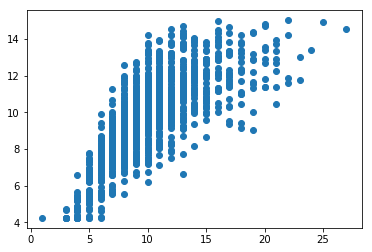

In [10]:
plt.scatter(x=tsty, y=knn_pred_tst)
print(np.correlate(tsty, knn_pred_tst))

In [11]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(knn_pred_tst, tsty)))
print('R2:', metrics.r2_score(tsty, knn_pred_tst))

RMSE: 2.2133876196088975
R2: 0.5359445291201275
